In [1]:
!pip install selenium

In [32]:
import selenium
from selenium import webdriver
import time
import datetime
import pandas as pd
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException,ElementNotInteractableException
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

In [3]:
driver = webdriver.Chrome(r"C:\chromedriver2.exe")
time.sleep(2)

In [4]:
driver.get("https://flight.yatra.com/air-search-ui/dom2/trigger?type=O&viewName=normal&flexi=0&noOfSegments=1&origin=DEL&originCountry=IN&destination=BOM&destinationCountry=IN&flight_depart_date=22%2F10%2F2021&ADT=1&CHD=0&INF=0&class=Economy&source=fresco-home&unqvaldesktop=65702486068")

In [5]:
#scraping names of the Airlines
Aname=[]
try:
    Bran=driver.find_elements_by_xpath("//div[@class='fs-13 airline-name no-pad col-8']")
    for i in Bran:
        Aname.append(i.text)
except NoSuchElementException:#handling no such element exception
    Aname.append('No details available')
except StaleElementReferenceException:#handling Stale element exception
    Aname.append('No details available')
time.sleep(2)

#scraping date of journey of the airlines
DOJ=[]
try:
    mode=driver.find_elements_by_xpath("//div[@class='fs-12']")
    for i in mode:
        DOJ.append(i.text)
except NoSuchElementException:#handling no such element exception
    DOJ.append('No details available')
except StaleElementReferenceException:#handling Stale element exception
    DOJ.append('No details available')
    time.sleep(2)

#scraping source of the journey
source=[]
try:
    vari=driver.find_elements_by_xpath("//div[@class='fs-10 font-lightgrey no-wrap city ellipsis']")
    for i in vari:
        source.append(i.text)
except NoSuchElementException:#handling no such element exception
    source.append('No details available')
except StaleElementReferenceException:#handling Stale element exception
    source.append('No details available')
    time.sleep(2)

#scraping destination of the journey
desti=[]
try:
    myr=driver.find_elements_by_xpath("//div[@class='fs-10 font-lightgrey no-wrap city ellipsis']")
    for i in myr:
        desti.append(i.text)
except NoSuchElementException:#handling no such element exception
    desti.append('No details available')
except StaleElementReferenceException:#handling Stale element exception
    desti.append('No details available')
time.sleep(2)

#scraping route
route=[]
try:
    km=driver.find_elements_by_xpath("//div[@class='text-left pr-5']")
    for i in km:
        route.append(i.text)
except NoSuchElementException:#handling no such element exception
    route.append('No details available')
except StaleElementReferenceException:#handling Stale element exception
    route.append('No details available')

#scraping departure time
dtime=[]
try:
    km=driver.find_elements_by_xpath("//div[@class='i-b pr']")
    for i in km:
        dtime.append(i.text)
except NoSuchElementException:#handling no such element exception
    dtime.append('No details available')
except StaleElementReferenceException:#handling Stale element exception
    dtime.append('No details available')
 
#scraping arrival time

atime=[]
try:
    km=driver.find_elements_by_xpath("//div[@class='bold fs-15 mb-2 pr time']")
    for i in km:
        atime.append(i.text)
except NoSuchElementException:#handling no such element exception
    atime.append('No details available')
except StaleElementReferenceException:#handling Stale element exception
    atime.append('No details available')
#scraping duration
duration=[]
try:
    km=driver.find_elements_by_xpath("//div[@class='fs-12 bold du mb-2']")
    for i in km:
        duration.append(i.text)
except NoSuchElementException:#handling no such element exception
    duration.append('No details available')
except StaleElementReferenceException:#handling Stale element exception
    duration.append('No details available')

#scraping total stops
tstops=[]
try:
    km=driver.find_elements_by_xpath("//div[@class='dotted-borderbtm']")
    for i in km:
        tstops.append(i.text)
except NoSuchElementException:#handling no such element exception
    tstops.append('No details available')
except StaleElementReferenceException:#handling Stale element exception
    tstops.append('No details available')
    
#scraping additional info
ainfo=[]
try:
    km=driver.find_elements_by_xpath("//div[@class='fs-15 mr-2 ytfi-rupee']")
    for i in km:
        ainfo.append(i.text)
except NoSuchElementException:#handling no such element exception
    ainfo.append('No details available')
except StaleElementReferenceException:#handling Stale element exception
    ainfo.append('No details available')
    
#scraping price
price=[]
try:
    km=driver.find_elements_by_xpath("//div[@class='fs-15 mr-2 ytfi-rupee']")
    for i in km:
        price.append(i.text)
except NoSuchElementException:#handling no such element exception
    price.append('No details available')
except StaleElementReferenceException:#handling Stale element exception
    price.append('No details available')
    
#preparing dataframe
df=pd.DataFrame({"Airline":Aname,
                 "Date_Of_Journey":DOJ,
               "Source":source,
               "Destination":desti,
               "Route":route,               
                 "Dep_Time":dtime,
                "Arrival_Time":atime,
               "Duration":duration, 
               "Total_Stops":tstops,
               "additional_Info":ainfo,  
               "Price":price})
df        
#df.to_csv (r'C:\Users\hm\Desktop\flight.csv', index = False, header=True)

#print (df)

,Airline,Date_Of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,additional_Info,Price


# Importing dataset

In [6]:
data = pd.read_csv('flight.csv')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Day,Month,Year,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min,Duration_bool
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2:50,0,No Info,...,24,MAR,2019,22,20,1,10,2,50.0,170.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7:25,2,No Info,...,1,MAY,2019,5,50,13,15,7,25.0,445.0
2,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5:25,1,No Info,...,12,MAY,2019,18,5,23,30,5,25.0,325.0
3,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4:45,1,No Info,...,1,MAR,2019,16,50,21,35,4,45.0,285.0
4,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2:25,0,No Info,...,24,JUN,2019,9,0,11,25,2,25.0,145.0


In [7]:
pd.set_option('display.max_columns', None)

In [8]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min,Duration_bool
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2:50,0,No Info,3897,24,MAR,2019,22,20,1,10,2,50.0,170.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7:25,2,No Info,7662,1,MAY,2019,5,50,13,15,7,25.0,445.0
2,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5:25,1,No Info,6218,12,MAY,2019,18,5,23,30,5,25.0,325.0
3,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4:45,1,No Info,13302,1,MAR,2019,16,50,21,35,4,45.0,285.0
4,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2:25,0,No Info,3873,24,JUN,2019,9,0,11,25,2,25.0,145.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9650 entries, 0 to 9649
Data columns (total 21 columns):
Airline            9650 non-null object
Date_of_Journey    9650 non-null object
Source             9650 non-null object
Destination        9650 non-null object
Route              9650 non-null object
Dep_Time           9650 non-null object
Arrival_Time       9650 non-null object
Duration           9650 non-null object
Total_Stops        9650 non-null int64
Additional_Info    9650 non-null object
Price              9650 non-null int64
Day                9650 non-null int64
Month              9650 non-null object
Year               9650 non-null int64
Dep_Hr             9650 non-null int64
Dep_Min            9650 non-null int64
Arr_Hr             9650 non-null int64
Arr_Min            9650 non-null int64
Duration_Hr        9650 non-null int64
Duration_Min       9650 non-null float64
Duration_bool      9650 non-null float64
dtypes: float64(2), int64(9), object(10)
memory usage: 1.5+ 

In [10]:
data["Duration"].value_counts()

2:50     550
1:30     386
2:45     337
2:55     337
2:35     329
        ... 
3:25       1
29:10      1
19:50      1
33:20      1
35:35      1
Name: Duration, Length: 338, dtype: int64

In [11]:
data.dropna(inplace = True)

In [12]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Day                0
Month              0
Year               0
Dep_Hr             0
Dep_Min            0
Arr_Hr             0
Arr_Min            0
Duration_Hr        0
Duration_Min       0
Duration_bool      0
dtype: int64

no null value found in above dataset

# EDA


we can see that Date_of_Journey is a object data type,
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

In [13]:
data["Journey_day"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [14]:
data["Journey_month"] = pd.to_datetime(data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [15]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min,Duration_bool,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2:50,0,No Info,3897,24,MAR,2019,22,20,1,10,2,50.0,170.0,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7:25,2,No Info,7662,1,MAY,2019,5,50,13,15,7,25.0,445.0,1,5
2,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5:25,1,No Info,6218,12,MAY,2019,18,5,23,30,5,25.0,325.0,12,5
3,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4:45,1,No Info,13302,1,MAR,2019,16,50,21,35,4,45.0,285.0,1,3
4,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2:25,0,No Info,3873,24,JUN,2019,9,0,11,25,2,25.0,145.0,24,6


In [16]:
data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [17]:
# Extracting Hours
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour

# Extracting Minutes
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
data.drop(["Dep_Time"], axis = 1, inplace = True)

In [18]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min,Duration_bool,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,2:50,0,No Info,3897,24,MAR,2019,22,20,1,10,2,50.0,170.0,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7:25,2,No Info,7662,1,MAY,2019,5,50,13,15,7,25.0,445.0,1,5,5,50
2,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5:25,1,No Info,6218,12,MAY,2019,18,5,23,30,5,25.0,325.0,12,5,18,5
3,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4:45,1,No Info,13302,1,MAR,2019,16,50,21,35,4,45.0,285.0,1,3,16,50
4,SpiceJet,Kolkata,Banglore,CCU → BLR,11:25,2:25,0,No Info,3873,24,JUN,2019,9,0,11,25,2,25.0,145.0,24,6,9,0


In [19]:

# Extracting Hours
data["Arrival_hour"] = pd.to_datetime(data.Arrival_Time).dt.hour

# Extracting Minutes
data["Arrival_min"] = pd.to_datetime(data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
data.drop(["Arrival_Time"], axis = 1, inplace = True)
train_data.drop(["Duration"], axis = 1, inplace = True)

In [20]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min,Duration_bool,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2:50,0,No Info,3897,24,MAR,2019,22,20,1,10,2,50.0,170.0,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7:25,2,No Info,7662,1,MAY,2019,5,50,13,15,7,25.0,445.0,1,5,5,50,13,15
2,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5:25,1,No Info,6218,12,MAY,2019,18,5,23,30,5,25.0,325.0,12,5,18,5,23,30
3,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4:45,1,No Info,13302,1,MAR,2019,16,50,21,35,4,45.0,285.0,1,3,16,50,21,35
4,SpiceJet,Kolkata,Banglore,CCU → BLR,2:25,0,No Info,3873,24,JUN,2019,9,0,11,25,2,25.0,145.0,24,6,9,0,11,25


# Handling Categorical Data

In [40]:

data["Airline"].value_counts()

Jet Airways                          3367
IndiGo                               1932
Air India                            1628
Multiple carriers                     945
SpiceJet                              813
Vistara                               462
Air Asia                              306
GoAir                                 177
Multiple carriers Premium economy      11
Jet Airways Business                    5
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

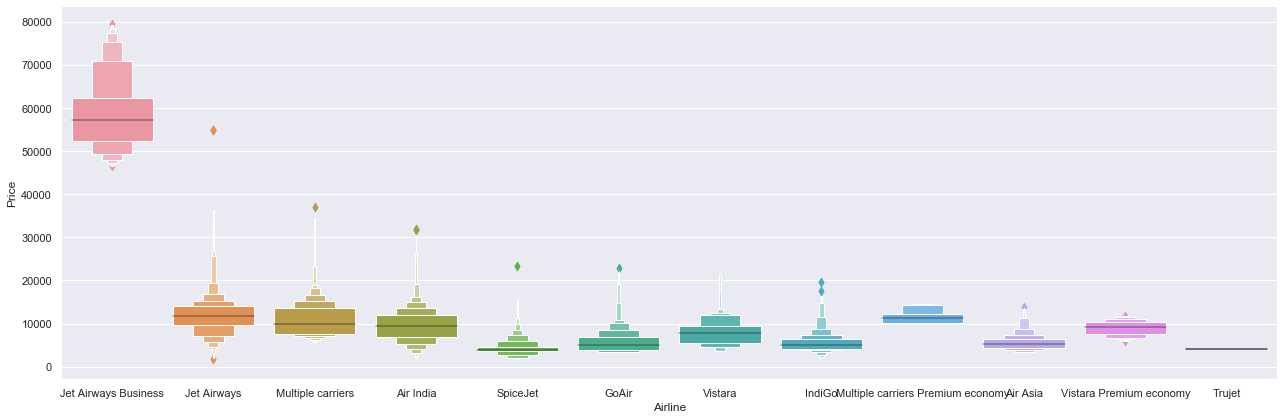

In [42]:
# Airlines vs Price
sns.catplot(y = "Price", x = "Airline", data = data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [43]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0


In [44]:
data["Source"].value_counts()

Delhi       3929
Kolkata     2743
Banglore    1911
Mumbai       686
Chennai      381
Name: Source, dtype: int64

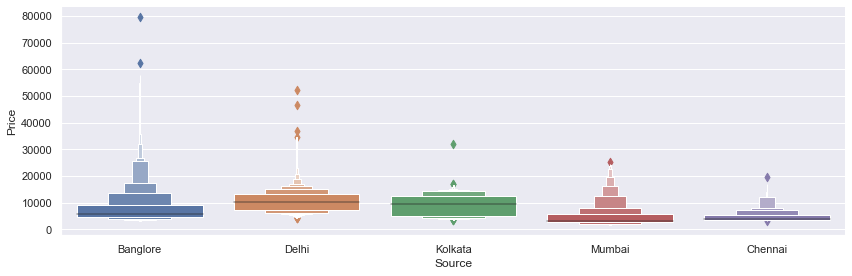

In [45]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [46]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,0
4,0,0,1,0


In [47]:
data["Destination"].value_counts()

Cochin       3929
Banglore     2743
Delhi        1037
New Delhi     874
Hyderabad     686
Kolkata       381
Name: Destination, dtype: int64

In [48]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,1
4,0,0,0,0,0


In [49]:
data["Route"]

0                   BLR → DEL
1       CCU → IXR → BBI → BLR
2             CCU → NAG → BLR
3             BLR → NAG → DEL
4                   CCU → BLR
                ...          
9645                BLR → DEL
9646                CCU → BLR
9647                CCU → BLR
9648                BLR → DEL
9649    DEL → GOI → BOM → COK
Name: Route, Length: 9650, dtype: object

In [50]:
data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [51]:
data["Total_Stops"].value_counts()

1    5002
0    3230
2    1386
3      31
4       1
Name: Total_Stops, dtype: int64

In [52]:
# As this is case of Ordinal Categorical type we perform LabelEncoder

data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [53]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Day,Month,Year,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min,Duration_bool,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2:50,0,3897,24,MAR,2019,22,20,1,10,2,50.0,170.0,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7:25,2,7662,1,MAY,2019,5,50,13,15,7,25.0,445.0,1,5,5,50,13,15
2,IndiGo,Kolkata,Banglore,5:25,1,6218,12,MAY,2019,18,5,23,30,5,25.0,325.0,12,5,18,5,23,30
3,IndiGo,Banglore,New Delhi,4:45,1,13302,1,MAR,2019,16,50,21,35,4,45.0,285.0,1,3,16,50,21,35
4,SpiceJet,Kolkata,Banglore,2:25,0,3873,24,JUN,2019,9,0,11,25,2,25.0,145.0,24,6,9,0,11,25


In [54]:
data_train = pd.concat([data, Airline, Source, Destination], axis = 1)

In [55]:
data_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Day,Month,Year,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min,Duration_bool,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,2:50,0,3897,24,MAR,2019,22,20,1,10,2,50.0,170.0,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,7:25,2,7662,1,MAY,2019,5,50,13,15,7,25.0,445.0,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,IndiGo,Kolkata,Banglore,5:25,1,6218,12,MAY,2019,18,5,23,30,5,25.0,325.0,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,IndiGo,Banglore,New Delhi,4:45,1,13302,1,MAR,2019,16,50,21,35,4,45.0,285.0,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,SpiceJet,Kolkata,Banglore,2:25,0,3873,24,JUN,2019,9,0,11,25,2,25.0,145.0,24,6,9,0,11,25,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [56]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [57]:
data_train.head()

,Duration,Total_Stops,Price,Day,Month,Year,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min,Duration_bool,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2:50,0,3897,24,MAR,2019,22,20,1,10,2,50.0,170.0,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,7:25,2,7662,1,MAY,2019,5,50,13,15,7,25.0,445.0,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,5:25,1,6218,12,MAY,2019,18,5,23,30,5,25.0,325.0,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4:45,1,13302,1,MAR,2019,16,50,21,35,4,45.0,285.0,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2:25,0,3873,24,JUN,2019,9,0,11,25,2,25.0,145.0,24,6,9,0,11,25,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [58]:
data_train.shape

(9650, 39)

In [59]:
data_train.columns

Index(['Duration', 'Total_Stops', 'Price', 'Day', 'Month', 'Year', 'Dep_Hr',
       'Dep_Min', 'Arr_Hr', 'Arr_Min', 'Duration_Hr', 'Duration_Min',
       'Duration_bool', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [65]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min',  'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,24,6,9,0,11,25,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [61]:
y = data_train.iloc[:, 1]
y.head()

0    0
1    2
2    1
3    1
4    0
Name: Total_Stops, dtype: int64

HeatMap

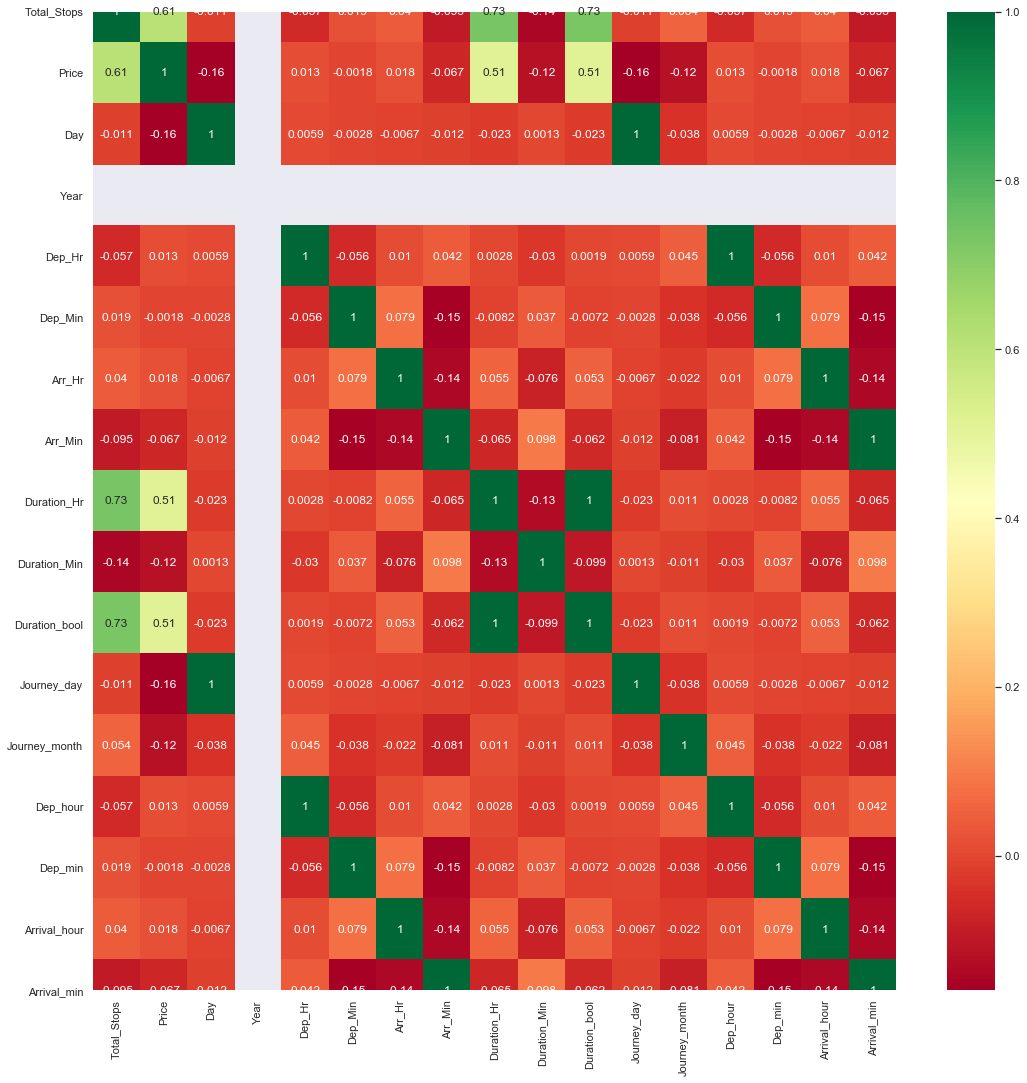

In [63]:
plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

ExtraTreesRegressor

In [66]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [67]:
print(selection.feature_importances_)

[7.90674055e-01 0.00000000e+00 0.00000000e+00 3.78469718e-04
 3.29665852e-04 0.00000000e+00 0.00000000e+00 9.34838287e-03
 0.00000000e+00 0.00000000e+00 3.36417010e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.11977653e-02
 2.22614909e-02 0.00000000e+00 9.49303538e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.51564671e-03]


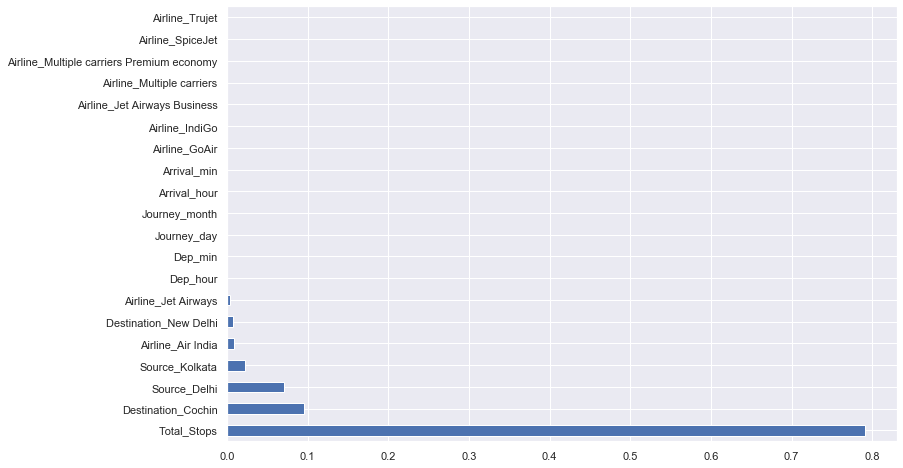

In [68]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Fitting model using Random Forest

In [69]:
#Split dataset into train and test set in order to prediction 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [70]:
#Import model and fit the data
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [71]:
#Predict w.r.t X_test
y_pred = reg_rf.predict(X_test)

In [72]:
#In regression check RSME Score
reg_rf.score(X_train, y_train)



0.9999770854061345

In [73]:
reg_rf.score(X_test, y_test)

0.9999770854061345

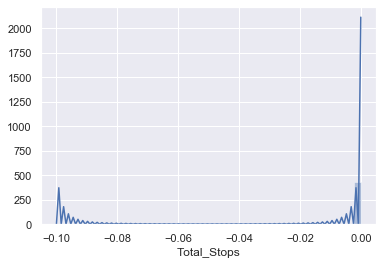

In [74]:
sns.distplot(y_test-y_pred)
plt.show()

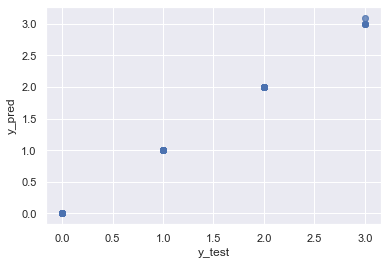

In [75]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [76]:
from sklearn import metrics

In [77]:

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.00010362694300518144
MSE: 1.0362694300518154e-05
RMSE: 0.0032191138998982553


In [78]:
2090.5509/(max(y)-min(y))

522.637725

In [79]:
metrics.r2_score(y_test, y_pred)

0.9999770854061345

Hyperparameter Tuning


In [80]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [82]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [83]:
# Random search of parameters, using 5 fold cross validation, 

rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [84]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=N...


In [85]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [86]:
prediction = rf_random.predict(X_test)

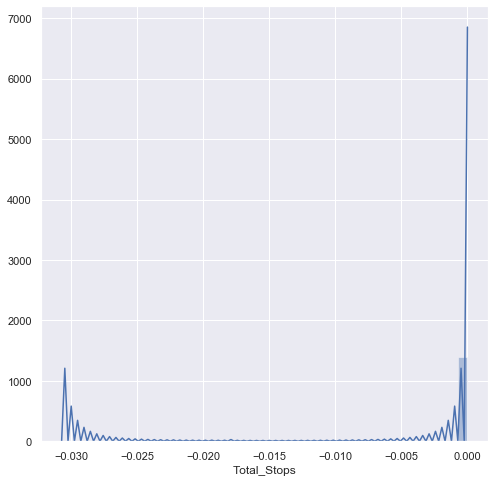

In [87]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

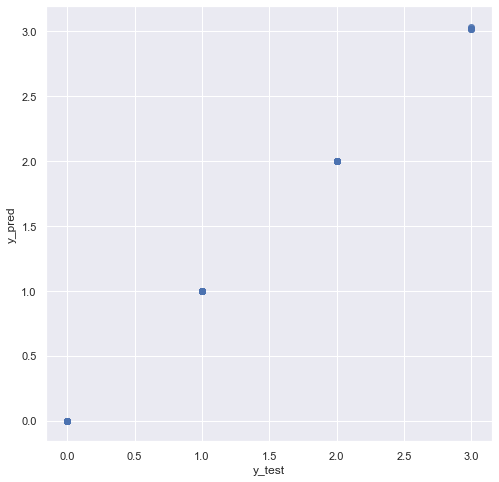

In [88]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [89]:

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 9.961135933120511e-05
MSE: 2.252818748458939e-06
RMSE: 0.0015009392887318724


Saving Model

In [90]:
import pickle
# open a file, where you ant to store the data
file = open('flight_pred.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)